# EDA 리포트: 홈 어드밴티지의 실체 분석

## 1. 가설
* 올림픽 개최국은 평소보다 유의미하게 높은 메달 성과를 거둘 것이다.
    * 세부가설 1: 개최국 시 개최국 특혜로 인해 선수단 규모가 증가하는데, 메달의 총량 증가는 선수단 규모의 확장에 의한 것이다.
    * 세부가설 2: 수영이나 육상처럼 기록으로 승부하는 '측정 종목'보다는 심판의 심사로 주관적인 판단이 개입이 되는 '심사 종목'에서 개최국 이점이 크게 나타날 것이다.
    * 세부가설 3: 영구적인 체육 경쟁력의 상승이 아니라 일시적 스파이크 현상일 것이다.

### 세부가설 1: 개최국 시 개최국 특혜로 인해 선수단 규모가 증가하는데, 메달의 총량 증가는 선수단 규모의 확장에 의한 것이다.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plt_theme
plt.style.use('dark_background')
sns.set_theme(style="darkgrid", rc={
    "axes.facecolor": "#1e1e1e",
    "grid.color": "#3c3c3c",
    "figure.facecolor": "#1e1e1e",
    "xtick.color": "white",  # x축 눈금 색상
    "ytick.color": "white",  # y축 눈금 색상
    "text.color": "white"
})
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

### 데이터 수집

In [88]:
# 1. 데이터 정제
# host_map 정의 (개최 도시 - 국가 NOC 매핑)
host_map = {    # data_loader.py 파일의 데이터
    # 하계 올림픽
    'Athina': 'GRE',
    'Paris': 'FRA',
    'St. Louis': 'USA',
    'London': 'GBR',
    'Stockholm': 'SWE',
    'Antwerpen': 'BEL',
    'Amsterdam': 'NED',
    'Los Angeles': 'USA',
    'Berlin': 'GER',
    'Helsinki': 'FIN',
    'Melbourne': 'AUS',
    'Roma': 'ITA',
    'Tokyo': 'JPN',
    'Mexico City': 'MEX',
    'Munich': 'GER',
    'Montreal': 'CAN',
    'Moskva': 'RUS',
    'Seoul': 'KOR',
    'Barcelona': 'ESP',
    'Atlanta': 'USA',
    'Sydney': 'AUS',
    'Beijing': 'CHN',
    'Rio de Janeiro': 'BRA',

    # 동계 올림픽
    'Chamonix': 'FRA',
    'Sankt Moritz': 'SUI',
    'Lake Placid': 'USA',
    'Garmisch-Partenkirchen': 'GER',
    'Oslo': 'NOR',
    'Cortina d\'Ampezzo': 'ITA',
    'Squaw Valley': 'USA',
    'Innsbruck': 'AUT',
    'Grenoble': 'FRA',
    'Sapporo': 'JPN',
    'Sarajevo': 'YUG',
    'Calgary': 'CAN',
    'Albertville': 'FRA',
    'Lillehammer': 'NOR',
    'Nagano': 'JPN',
    'Salt Lake City': 'USA',
    'Torino': 'ITA',
    'Vancouver': 'CAN',
    'Sochi': 'RUS'
}

# 1. 데이터 로드
df = pd.read_csv('./data/athlete_events.csv')
regions = pd.read_csv('./data/noc_regions.csv')

# 소스 통일을 위해 가지고 왔으나, 하단에서 필요한 데이터셋을 병합해서 만드므로 해당 부분 주석처리
# 2. NOC-Region 결합
# df = pd.merge(df, regions, on='NOC', how='left')
#
# # 3. 개최국 정보 매핑(host_country_map활용)
# df['Host_NOC'] = df['City'].map(host_country_map)
#
# # 4. 개최국 여부 (Is_Host) 생성
# # 해당 행의 NOC가 개최지 NOC와 같으면 True
# df['Is_Host'] = df['NOC'] == df['Host_NOC']

# 5. 메달 데이터 정제
# 1) NaN을 'No Medal'로 채워 시각화할 때 에러를 방지
# df['Medal'] = df['Medal'].fillna('None')
#
# # 2) 단체전 메달 중복 계산 방지
# # 동일 경기(Games), 동일 연도, 동일 종목(Event), 동일 메달인 경우 1개로 처리
# df['Medal_Won'] = df['Medal'].apply(lambda x: 1 if x != 'None' else 0)
#
# # 6. 확인 출력
# print(f"개최국 데이터(행) 수: {df['Is_Host'].sum()}건")
# print(df[['City', 'Host_NOC', 'Is_Host']].head(10))

### 데이터 집계

In [86]:
# 2. 선수 단위의 데이터 집계
# 메달 수 집계 (City 정보를 포함하여 Groupby)
# 선수단 규모 (ID 기반)
athlete_counts = df.groupby(['Year', 'City', 'NOC'])['ID'].nunique().reset_index(name='Athlete_Count')

# 메달 수 (팀 경기 중복 제거)
medal_counts = df[df['Medal'].notna()].drop_duplicates(['Year', 'Event', 'Medal', 'NOC'])
medal_counts = medal_counts.groupby(['Year', 'City', 'NOC'])['Medal'].count().reset_index(name='Medal_Count')

# 4. 데이터 병합 (Year, City, NOC 기준)
analysis_df = pd.merge(athlete_counts, medal_counts, on=['Year', 'City', 'NOC'], how='left').fillna(0)

# 5. Is_Host 컬럼 생성 (City를 host_map에 대조하여 판별)
analysis_df['Is_Host'] = analysis_df.apply(
    lambda x: 1 if host_map.get(x['City']) == x['NOC'] else 0, axis=1
)

# 6. 결과 확인
print(analysis_df[analysis_df['Is_Host'] == 1].head(20))

     Year                    City  NOC  Athlete_Count  Medal_Count  Is_Host
6    1896                  Athina  GRE            102           72        1
23   1900                   Paris  FRA            720          166        1
57   1904               St. Louis  USA            524          297        1
70   1906                  Athina  GRE            312          101        1
88   1908                  London  GBR            735          225        1
126  1912               Stockholm  SWE            444          143        1
132  1920               Antwerpen  BEL            336          137        1
164  1924                Chamonix  FRA             43           17        1
193  1924                   Paris  FRA            401          153        1
252  1928               Amsterdam  NED            266          114        1
289  1928            Sankt Moritz  SUI             41            9        1
310  1932             Lake Placid  USA             64           23        1
355  1932   

### 시각화

31
    Year   City  NOC  Athlete_Count  Medal_Count  Is_Host
12  1900  Paris  ARG              1            1        0
13  1900  Paris  AUS              2            6        0
14  1900  Paris  AUT             16           20        0
15  1900  Paris  BEL             64           38        0
16  1900  Paris  BOH              7            9        0
17  1900  Paris  BRA              1            3        0
18  1900  Paris  CAN              4            5        0
19  1900  Paris  COL              1            1        0
20  1900  Paris  CUB              1            2        0
21  1900  Paris  DEN             13           18        0
22  1900  Paris  ESP              9            7        0
23  1900  Paris  FRA            720          166        1
24  1900  Paris  GBR            104           63        0
25  1900  Paris  GER             76           29        0
26  1900  Paris  GRE              3            3        0
27  1900  Paris  HAI              3            4        0
28  1900  P

C:\Users\Playdata\miniconda3\envs\aistudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\miniconda3\envs\aistudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\miniconda3\envs\aistudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\miniconda3\envs\aistudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\miniconda3\envs\aistudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44508 (\N{HANGUL S

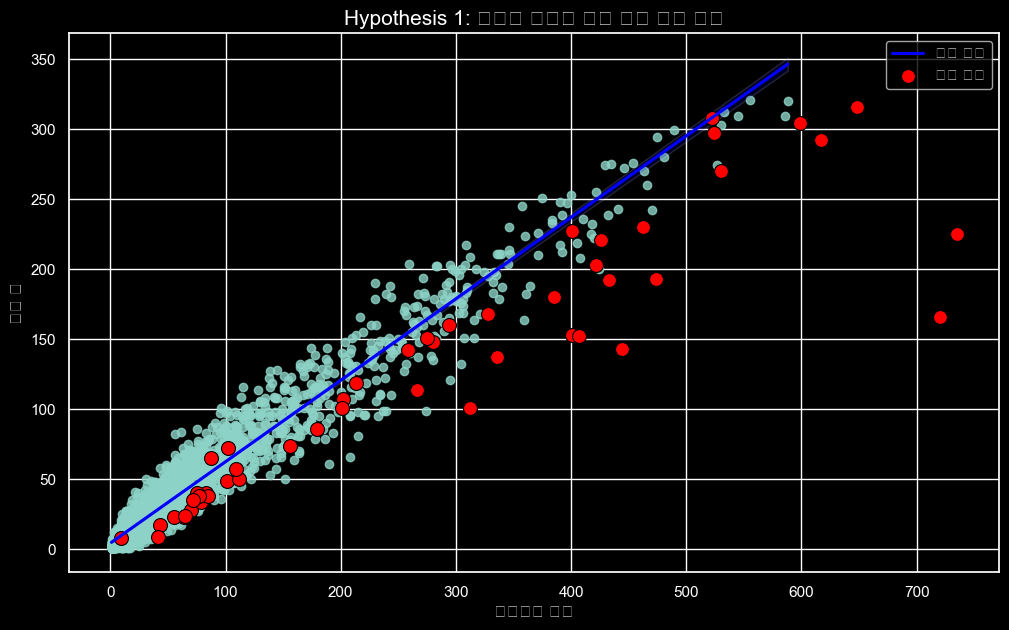

In [87]:
plt.figure(figsize=(12, 7))

# 일반 국가 데이터 (Is_Host == 0)
# X축, Y축 데이터에 대한 산점도와 회귀선을 추가한 시각도구로 regplot 선택.
sns.regplot(data=analysis_df[analysis_df['Is_Host'] == 0],
            x='Athlete_Count', y='Medal_Count',
            line_kws={'color':'blue', 'label':'일반 국가'})

# 개최국 데이터 강조 (Is_Host == 1)
sns.scatterplot(data=analysis_df[analysis_df['Is_Host'] == 1],
                x='Athlete_Count', y='Medal_Count',
                color='red', s=100, label='개최 국가', edgecolor='black')

plt.title('Hypothesis 1: 선수단 규모와 메달 수의 상관 관계', fontsize=15)
plt.xlabel('선수단의 규모')
plt.ylabel('메달 수')

plt.legend()
plt.show()

### 결론

그래프를 통해 확인할 수 있는 정보
1. 그래프의 파란색 추세선이 우상향 -> 선수단 규모와 메달 수 사이에 강력한 양의 상관관계가 있음.
2. 개최국(빨간점)의 위치: 빨간 점들이 파란 추세선과 겹쳐 있으면서도, 추세선의 하단에 위치하는 경향이 뚜렷함.
    * 특히 선수단 규모(X축)가 커질수록(오른쪽으로 갈수록) 추세선과의 간격이 더 벌어지는 경향이 보임.
    * 개최국은 평소보다 많은 메달을 획득하지만, 이는 늘어난 선수 수에 비례하는 수준에 미치지 못함. 따라서 홈 어드밴티지의 실체는 '질적 승리'가 아닌 '양적 공세'의 결과로 해석됨.